In [1]:

import pandas as pd
import json
from pandas.io.json import json_normalize  
import numpy as np
from tabulate import tabulate

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def stats_analysis(df2, df3):
#     df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
#     df3 = df2.loc[~df2.index.str.contains("None")]
    # extract time_access dict to data fram
    df_time_access = pd.DataFrame(df3.time_access.values.tolist(), index=df3.index.values)
    df_time_access = df_time_access.fillna(0)
    
    # counts accesses to edges
    counts = df_time_access.values.flatten()
#     counts2 = counts[(counts>0) & (counts<120)]
    counts2 = counts[(counts>0)]
    
    ratios = []
    cl = len(counts2)
    for i in range(1, 11):
        ratios.append(len(counts2[counts2==i])/cl)
        
        
    step_groupings = []
    cs = sum(counts2)
    for i in range(0, 21):
        step_groupings.append((i, sum(counts2[counts2>i])/cs))
        
    step_groupings = np.array(step_groupings)
    l1, l2 = zip(*step_groupings)
    print("How many edges had more than X visits in the same step")
    print(tabulate(step_groupings))
    
    
    step_groupings_pd = pd.DataFrame()
    step_groupings_pd['bound'] = l1
    step_groupings_pd['fraction'] = l2

    print("avg per step")
    print(np.average(counts2))
    
    
    print("median per step")
    print(np.median(counts2))
    
    plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
    plt.xlabel("visits per step")
    plt.ylabel("fraction of total visits")
    plt.show()
    
    
    plt.bar(range(1,11), np.array(ratios))
    plt.xlabel("traversals per step")
    plt.ylabel("fraction of total traversals")
    plt.show()
    
    
    plt.hist(counts2, bins=int(max(counts2)))
    plt.xlabel("traversals per step")
    plt.ylabel("count")
    plt.show()
    
    
    plt.plot(df2.groupby('source_neighbors').mean()['count'])
    plt.xlabel("count of traversals")
    plt.ylabel("source node neighbors")
    plt.show()
    
    
    count_mean = df2.groupby('source_neighbors').mean()['count']
    count_mean_limit_100 = count_mean[count_mean.index < 100]
    count_mean_limit_50 = count_mean[count_mean.index < 50]
    count_mean_limit_10 = count_mean[count_mean.index < 10]
    
    
    plt.plot(count_mean_limit_100)
    plt.title("count_mean_limit_100")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_50)
    plt.title("count_mean_limit_50")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_10)
    plt.title("count_mean_limit_10")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(df2.groupby('target_neighbors').mean()['count'])
    plt.title("target count")
    plt.ylabel("count of traversals")
    plt.xlabel("target node neighbors")
    plt.show()
    
    
    print("count mean")
    print(df2['count'].mean())
    print("count max")
    print(max(df2['count']))
    
    
    count_groups = df2.groupby('count').size()
    
    groupings_percentages = []
    for i in range(1, max(df2['count']), 5):
        groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))
    groupings_percentages = np.array(groupings_percentages)
    
    l1, l2 = zip(*groupings_percentages)
    pd_groupings = pd.DataFrame()
    pd_groupings['fraction'] = l2
    pd_groupings['bound'] = l1
    
    pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]
    
    print(tabulate(pd_groupings_sig))
    
    
    plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
    plt.xlabel("visits in total")
    plt.ylabel("fraction on total visits")
    plt.show()
    
    
    plt.plot(df2.groupby('count').size())
    plt.xlabel("visits per edge")
    plt.ylabel("number of occurrences")
    plt.show()
    
    count_groups = df2.groupby('count').size()
    count_groups_500 = count_groups[count_groups < 500]
    count_groups[count_groups < 10]

In [4]:
def stat_analysis2(df):
    
    return df

In [15]:
def read_df(path):
    return pd.read_json(path)

In [6]:
def extract_stats(df):
    df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
    return df2, df2.loc[~df2.index.str.contains("None")]

In [19]:
df_32_100_1_06 = read_df("/Users/w.jurasz/Studies/GR/node2vec/notebooks/data/bias_edge_16_80_1_0.6.json")

OSError: [Errno 22] Invalid argument

In [11]:
df = read_df("data/stats_120_80_16000.json")
dfe = extract_stats(df)

--  ----------
 1  0.92194
 2  0.769105
 3  0.593741
 4  0.43692
 5  0.313101
 6  0.221343
 7  0.154917
 8  0.107504
 9  0.0742393
10  0.0514895
11  0.0363929
12  0.0262766
13  0.019723
14  0.0152769
15  0.0121369
16  0.00981034
17  0.00800851
18  0.00656265
19  0.00540744
20  0.00446237
--  ----------
avg per step
3.15021551231955
median per step
3.0


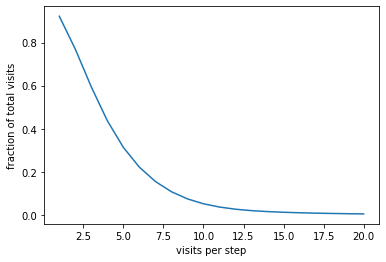

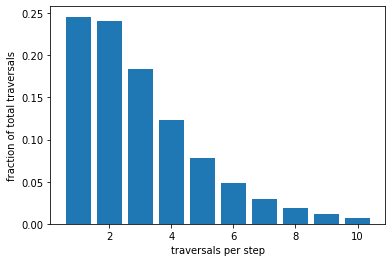

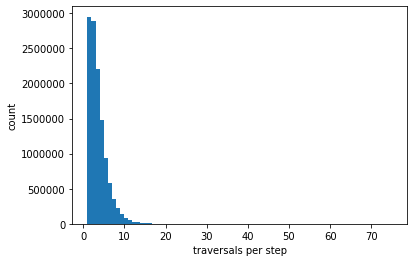

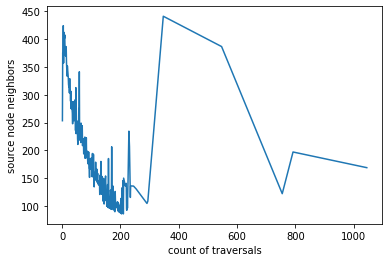

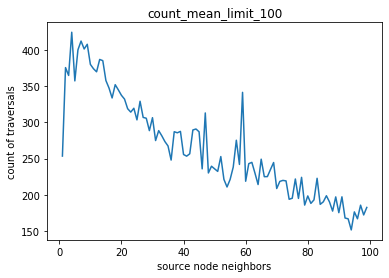

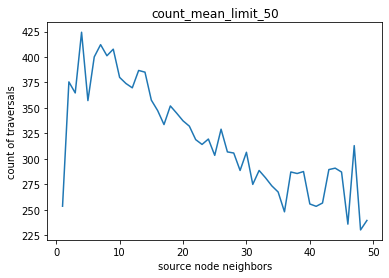

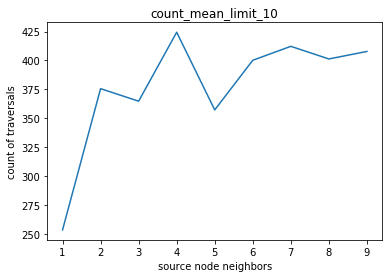

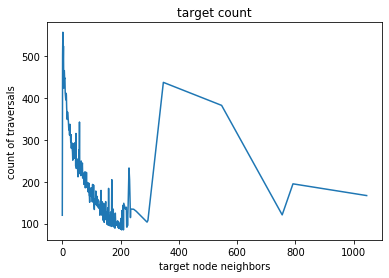

count mean
212.12318635842377
count max
1696
--  ---------  ---
17  0.944373    86
18  0.921333    91
19  0.897705    96
20  0.874254   101
21  0.852526   106
22  0.831225   111
23  0.810196   116
24  0.767594   121
25  0.746326   126
26  0.724537   131
27  0.702482   136
28  0.679652   141
29  0.656961   146
30  0.633942   151
31  0.610996   156
32  0.587872   161
33  0.56554    166
34  0.543181   171
35  0.520911   176
36  0.499604   181
37  0.478297   186
38  0.457727   191
39  0.437207   196
40  0.416926   201
41  0.397957   206
42  0.379431   211
43  0.361687   216
44  0.344845   221
45  0.328198   226
46  0.311595   231
47  0.2958     236
48  0.280964   241
49  0.267364   246
50  0.253846   251
51  0.24127    256
52  0.229243   261
53  0.217975   266
54  0.207316   271
55  0.197826   276
56  0.188824   281
57  0.180314   286
58  0.172592   291
59  0.165412   296
60  0.158908   301
61  0.152692   306
62  0.147379   311
63  0.142676   316
64  0.138205   321
65  0.134244   326
66  0

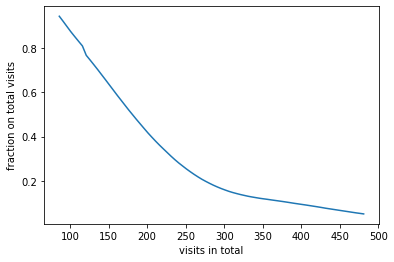

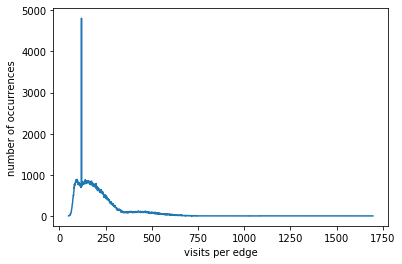

In [14]:
stats_analysis(dfe[0], dfe[1])

In [15]:
df = read_df("data/stats_120_80_1.json")
dfe_120_80_1 = extract_stats(df)

--  ----------
 0  1
 1  0.0431653
 2  0.0320198
 3  0.027237
 4  0.0235433
 5  0.0204606
 6  0.0180117
 7  0.0159588
 8  0.0142373
 9  0.0128139
10  0.0115523
11  0.0104392
12  0.00950513
13  0.00870748
14  0.00798958
15  0.007368
16  0.00685986
17  0.00637435
18  0.00591789
19  0.00554094
20  0.00520015
--  ----------
avg per step
1.033759247606491
median per step
1.0


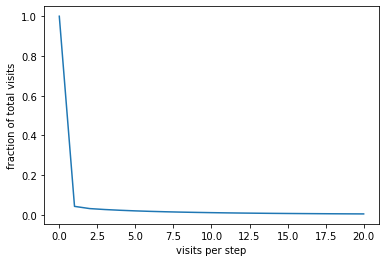

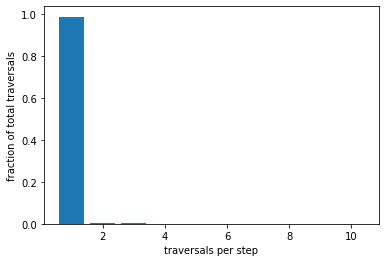

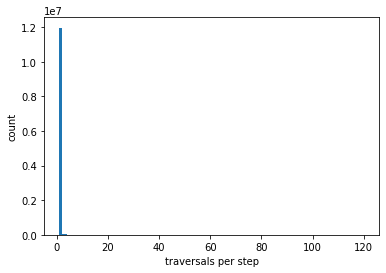

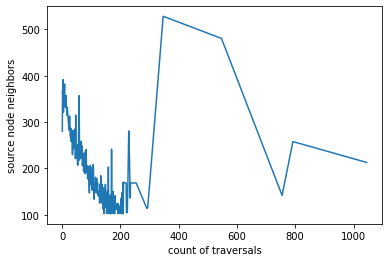

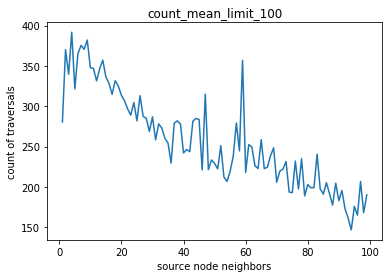

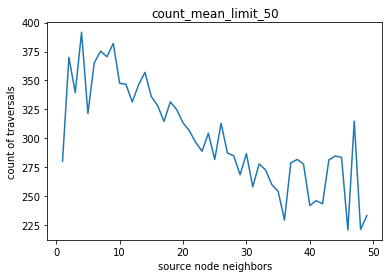

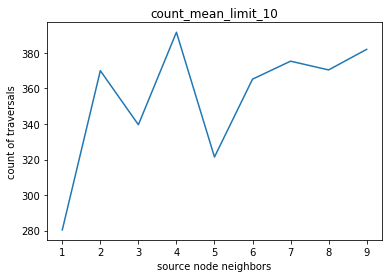

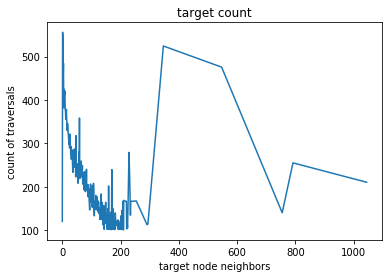

count mean
212.12318635842377
count max
1409
--  ---------  ---
20  0.917034   101
21  0.879617   106
22  0.847945   111
23  0.823586   116
24  0.781781   121
25  0.762896   126
26  0.742841   131
27  0.721667   136
28  0.700521   141
29  0.679298   146
30  0.65762    151
31  0.632867   156
32  0.604176   161
33  0.572083   166
34  0.541663   171
35  0.513592   176
36  0.490928   181
37  0.473832   186
38  0.46078    191
39  0.449052   196
40  0.436836   201
41  0.421485   206
42  0.403525   211
43  0.382528   216
44  0.359521   221
45  0.336209   226
46  0.312769   231
47  0.28939    236
48  0.266051   241
49  0.243558   246
50  0.222224   251
51  0.202585   256
52  0.184946   261
53  0.169534   266
54  0.157512   271
55  0.148238   276
56  0.141485   281
57  0.136338   286
58  0.132937   291
59  0.130322   296
60  0.128388   301
61  0.126527   306
62  0.124965   311
63  0.123774   316
64  0.122588   321
65  0.12163    326
66  0.120677   331
67  0.11984    336
68  0.119137   341
69  0

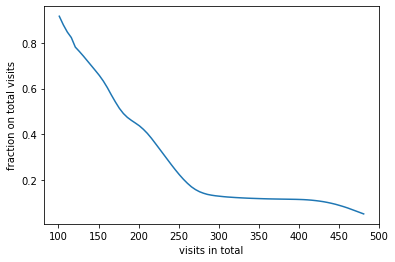

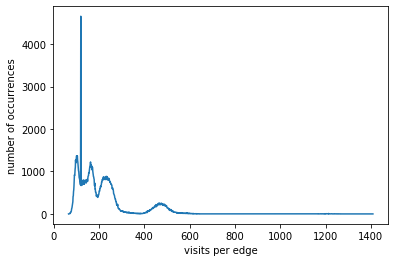

In [30]:
stats_analysis(dfe_120_80_1[0], dfe_120_80_1[1])

In [16]:
stat_analysis2(df_starting_nodes).fillna(0).sum(axis=1) / stat_analysis2(df_starting_nodes).count(axis=1)

(0, 1)        1.817204
(0, 10)       1.693662
(0, 100)      1.654362
(0, 101)      1.825279
(0, 102)      1.903915
                ...   
(999, 916)    1.039735
(999, 925)    1.025316
(999, 947)    1.044586
(999, 966)    1.053571
(999, 968)    1.069892
Length: 176468, dtype: float64

In [18]:
dfc = df_starting_nodes.count(axis=1)

In [22]:
dfc.mean()

172.17763560532222

In [20]:
dfs = df_starting_nodes.fillna(0).sum(axis=1)

In [23]:
dfs.mean()

210.58292154951607

In [52]:
dfc

(0, 1)        279
(0, 10)       284
(0, 100)      298
(0, 101)      269
(0, 102)      281
             ... 
(999, 916)    151
(999, 925)    158
(999, 947)    157
(999, 966)    168
(999, 968)    186
Length: 176468, dtype: int64

In [53]:
dfbc

(0, 1)        279
(0, 10)       284
(0, 100)      298
(0, 101)      269
(0, 102)      281
             ... 
(999, 916)    151
(999, 925)    158
(999, 947)    157
(999, 966)    168
(999, 968)    186
Length: 176468, dtype: int64

In [6]:
df = pd.read_json("data/stats_120_80_1.json")

In [8]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
df3 = df2.loc[~df2.index.str.contains("None")]
    


In [24]:
df_batches = pd.DataFrame(df3.batch_id.values.tolist(), index=df3.index.values)


In [48]:
dfbc = df_batches.count(axis=1)

In [50]:
dfbc.mean()

172.17763560532222

In [11]:
df_starting_nodes = pd.DataFrame(df3.starting_nodes.values.tolist(), index=df3.index.values)
# df_starting_nodes = df_starting_nodes.fillna(0)

In [ ]:
df = pd.read_json("data/stats.json")

In [ ]:
df1 = pd.read_json("data/stats1.json")

In [ ]:
df128 = pd.read_json("data/stats_20_10_128.json")
df32 = pd.read_json("data/stats_20_10_32.json")
df1 = pd.read_json("data/stats_20_10_1.json")

In [ ]:
df_80_1024 = pd.read_json("data/stats_120_80_1024.json")
df_80_512 = pd.read_json("data/stats_120_80_512.json")
df_80_128 = pd.read_json("data/stats_120_80_128.json")
df_80_64 = pd.read_json("data/stats_120_80_64.json")
df_80_16 = pd.read_json("data/stats_120_80_16.json")
df_80_1 = pd.read_json("data/stats_120_80_1.json")

In [ ]:
df_80_16000 = pd.read_json("data/stats_120_80_16000.json")

In [ ]:
df1 = pd.read_json("data/stats_20_20_1.json")
df16 = pd.read_json("data/stats_20_20_16.json")
df64 = pd.read_json("data/stats_20_20_64.json")

In [ ]:
df_80_131072 = pd.read_json("data/stats_120_80_131072.json")
df_80_65536 = pd.read_json("data/stats_120_80_65536.json")
df_80_2048 = pd.read_json("data/stats_120_80_2048.json")
df_80_512 = pd.read_json("data/stats_120_80_512.json")
df_80_128 = pd.read_json("data/stats_120_80_128.json")
df_80_16 = pd.read_json("data/stats_120_80_16.json")

In [29]:
df_120_80_64 = pd.read_json("data/stats_120_80_64.json")

In [35]:
df_120_80_64.stats

(0, 1)         {'count': 334, 'source_neighbors': 347, 'targe...
(0, 10)        {'count': 415, 'source_neighbors': 347, 'targe...
(0, 100)       {'count': 419, 'source_neighbors': 347, 'targe...
(0, 101)       {'count': 411, 'source_neighbors': 347, 'targe...
(0, 102)       {'count': 601, 'source_neighbors': 347, 'targe...
                                     ...                        
(999, 925)     {'count': 186, 'source_neighbors': 77, 'target...
(999, 947)     {'count': 154, 'source_neighbors': 77, 'target...
(999, 966)     {'count': 183, 'source_neighbors': 77, 'target...
(999, 968)     {'count': 253, 'source_neighbors': 77, 'target...
(999, None)    {'count': 120, 'source_neighbors': 77, 'target...
Name: stats, Length: 180507, dtype: object

In [36]:
df_120_80_64v2 = pd.DataFrame(df_120_80_64.stats.values.tolist(), index=df_120_80_64.index.values)

In [41]:
df_120_80_64v3 = df_120_80_64v2.loc[~df2.index.str.contains("None")]

In [43]:
dfa = df_120_80_64v3['count']/ df_120_80_64v3['target_neighbors']

In [45]:
dfa.mean()

7.364761683968151

In [27]:
df_20_10_1['stats']

(0, 10)        {'count': 1, 'source_neighbors': 347, 'target_...
(0, 102)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 103)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 104)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 107)       {'count': 1, 'source_neighbors': 347, 'target_...
                                     ...                        
(999, 1888)    {'count': 1, 'source_neighbors': 77, 'target_n...
(999, 925)     {'count': 2, 'source_neighbors': 77, 'target_n...
(999, 966)     {'count': 3, 'source_neighbors': 77, 'target_n...
(999, 968)     {'count': 3, 'source_neighbors': 77, 'target_n...
(999, None)    {'count': 20, 'source_neighbors': 77, 'target_...
Name: stats, Length: 146916, dtype: object

In [ ]:
stats_analysis(df1)

In [ ]:
stats_analysis(df_80_131072)

In [ ]:
stats_analysis(df_80_65536)

In [ ]:
stats_analysis(df_80_2048)

In [ ]:
stats_analysis(df_80_512)

In [ ]:
stats_analysis(df_80_128)

In [ ]:
stats_analysis(df_80_16)

In [ ]:
with open("data/stats.json") as datafile:
    data = json.load(datafile)


In [ ]:
df = pd.read_json("data/stats.json")

In [ ]:
df = df128

In [ ]:
df.index.values

In [ ]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)

In [ ]:
df2.loc['(1096, 107)']

In [ ]:
df3 = df2.loc[~df2.index.str.contains("None")]

In [ ]:
df4 = df2.loc[df2.index.str.contains("None")]

In [ ]:
df3

In [ ]:
df3

In [ ]:
df3.time_access.values.tolist()

In [17]:
df_time_access = pd.DataFrame(dfe_120_80_1[1].time_access.values.tolist(), index=dfe_120_80_1[1].index.values)

In [18]:
df3.time_access.values.tolist()

NameError: name 'df3' is not defined

In [19]:
df_time_access = df_time_access.fillna(0)

In [20]:
df_time_access.idxmax()

17    (3980, 4017)
51    (3994, 3982)
2          (0, 11)
4       (414, 642)
19    (1918, 2381)
          ...     
5     (3980, 4001)
42    (3988, 3980)
65    (3982, 4003)
55    (3488, 3557)
52    (3980, 4008)
Length: 78, dtype: object

In [21]:
counts = df_time_access.values.flatten()


In [23]:
df_time_access

,17,51,2,4,19,21,37,57,11,46,...,70,73,75,32,62,5,42,65,55,52
"(0, 1)",1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 10)",1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 100)",1.0,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 101)",1.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 102)",1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(999, 916)",1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
"(999, 925)",1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
"(999, 947)",1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(999, 966)",1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [24]:
counts

array([1., 1., 7., ..., 1., 1., 1.])

In [25]:
counts2 = counts[(counts>0) & (counts<120)]

In [27]:
counts2==1

array([ True,  True, False, ...,  True,  True,  True])

In [28]:
len(counts2[counts2==1])/len(counts2)

0.989142835972024

In [ ]:
ratios = []
for i in range(1, 11):
    ratios.append(len(counts2[counts2==i])/len(counts2))

In [ ]:
step_groupings = []
for i in range(1, 21):
    step_groupings.append((i, sum(counts2[counts2>i])/sum(counts2)))

In [ ]:
step_groupings = np.array(step_groupings)
l1, l2 = zip(*step_groupings)

In [ ]:
step_groupings

In [ ]:


step_groupings_pd = pd.DataFrame()
step_groupings_pd['bound'] = l1
step_groupings_pd['fraction'] = l2

plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

In [ ]:
plt.bar(range(1,11), np.array(ratios))
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

In [ ]:
plt.hist(counts2, bins=int(max(counts2)))
plt.xlabel("traversals per step")
plt.ylabel("count")

In [ ]:
plt.plot(df2.groupby('source_neighbors').mean()['count'])
plt.xlabel("count of traversals")
plt.ylabel("source node neighbors")

In [ ]:
count_mean = df2.groupby('source_neighbors').mean()['count']

In [ ]:
count_mean

In [ ]:
count_mean_limit_100 = count_mean[count_mean.index < 100]
count_mean_limit_50 = count_mean[count_mean.index < 50]
count_mean_limit_10 = count_mean[count_mean.index < 10]

In [ ]:
plt.plot(count_mean_limit_100)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(count_mean_limit_50)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(count_mean_limit_10)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(df2.groupby('target_neighbors').mean()['count'])
plt.ylabel("count of traversals")
plt.xlabel("target node neighbors")

In [ ]:
df2['count'].mean()

In [ ]:
df2['count'].median()

In [ ]:
max(df2['count'])

In [ ]:
df2['count']

In [ ]:
count_groups = df2.groupby('count').size()


In [ ]:
count_groups

In [ ]:
groupings_percentages = []
for i in range(1, max(df2['count']), 5):
    groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))

In [ ]:
groupings_percentages = np.array(groupings_percentages)
l1, l2 = zip(*groupings_percentages)


In [ ]:
pd_groupings = pd.DataFrame()
pd_groupings['fraction'] = l2
pd_groupings['bound'] = l1

In [ ]:
max(count_groups)

In [ ]:
pd_groupings

In [ ]:
pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]

In [ ]:
pd_groupings_sig

In [ ]:
plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
plt.xlabel("visits in total")
plt.ylabel("fraction on total visits")

In [ ]:
plt.plot(df2.groupby('count').size())

In [ ]:
count_groups = df2.groupby('count').size()
count_groups_500 = count_groups[count_groups < 500]

In [ ]:
count_groups[count_groups < 10]

In [ ]:
bins = range(0, max(df2['count']), 10)
pd.cut(count_groups, bins)

In [ ]:
plt.plot(count_groups_500)

In [ ]:
cut_df = pd.cut(count_groups, bins).to_frame()

In [ ]:
cut_df.groupby(0).size().head(20)